In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.datasets import make_classification

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB as MB

In [2]:
df=pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df = df.sample(n = 20000)

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
columns=df.columns[:-1]
columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [6]:
columns_str=''
for i in df.columns:
    columns_str=columns_str+i+'+'
columns_str

'Time+V1+V2+V3+V4+V5+V6+V7+V8+V9+V10+V11+V12+V13+V14+V15+V16+V17+V18+V19+V20+V21+V22+V23+V24+V25+V26+V27+V28+Amount+Class+'

<AxesSubplot:>

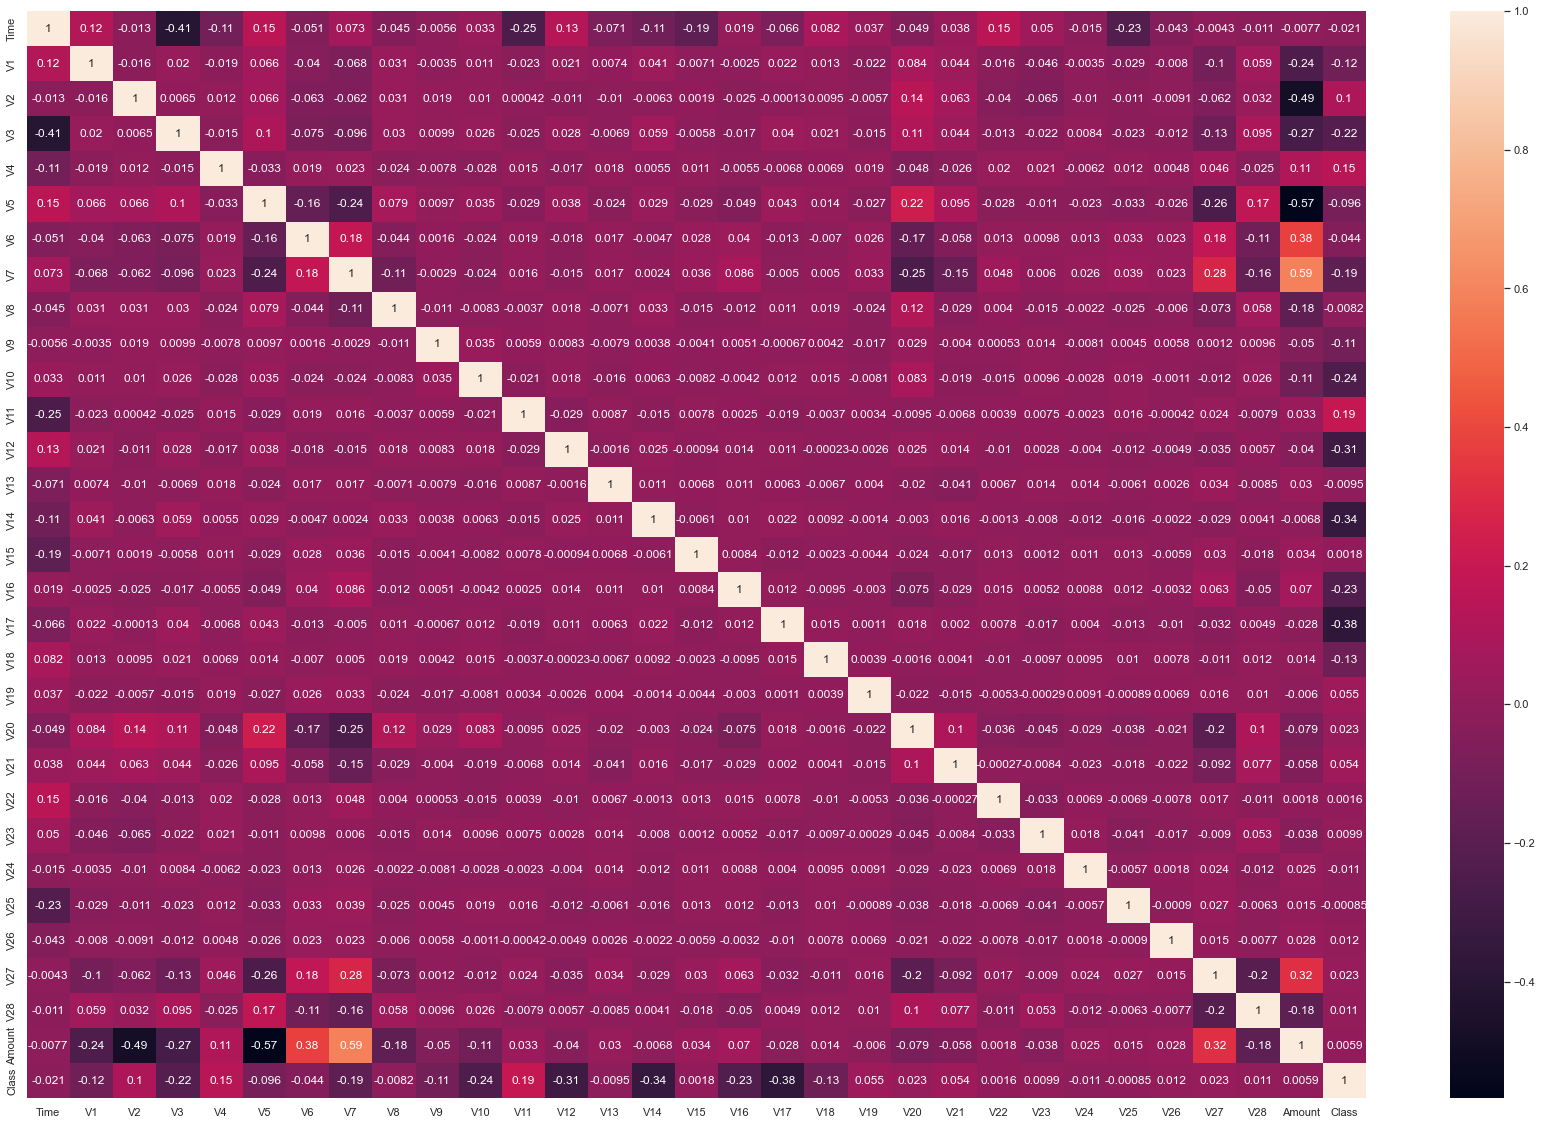

In [7]:
sns.set(rc={'figure.figsize':(30,20)})
sns.heatmap(df.corr(),annot=True)

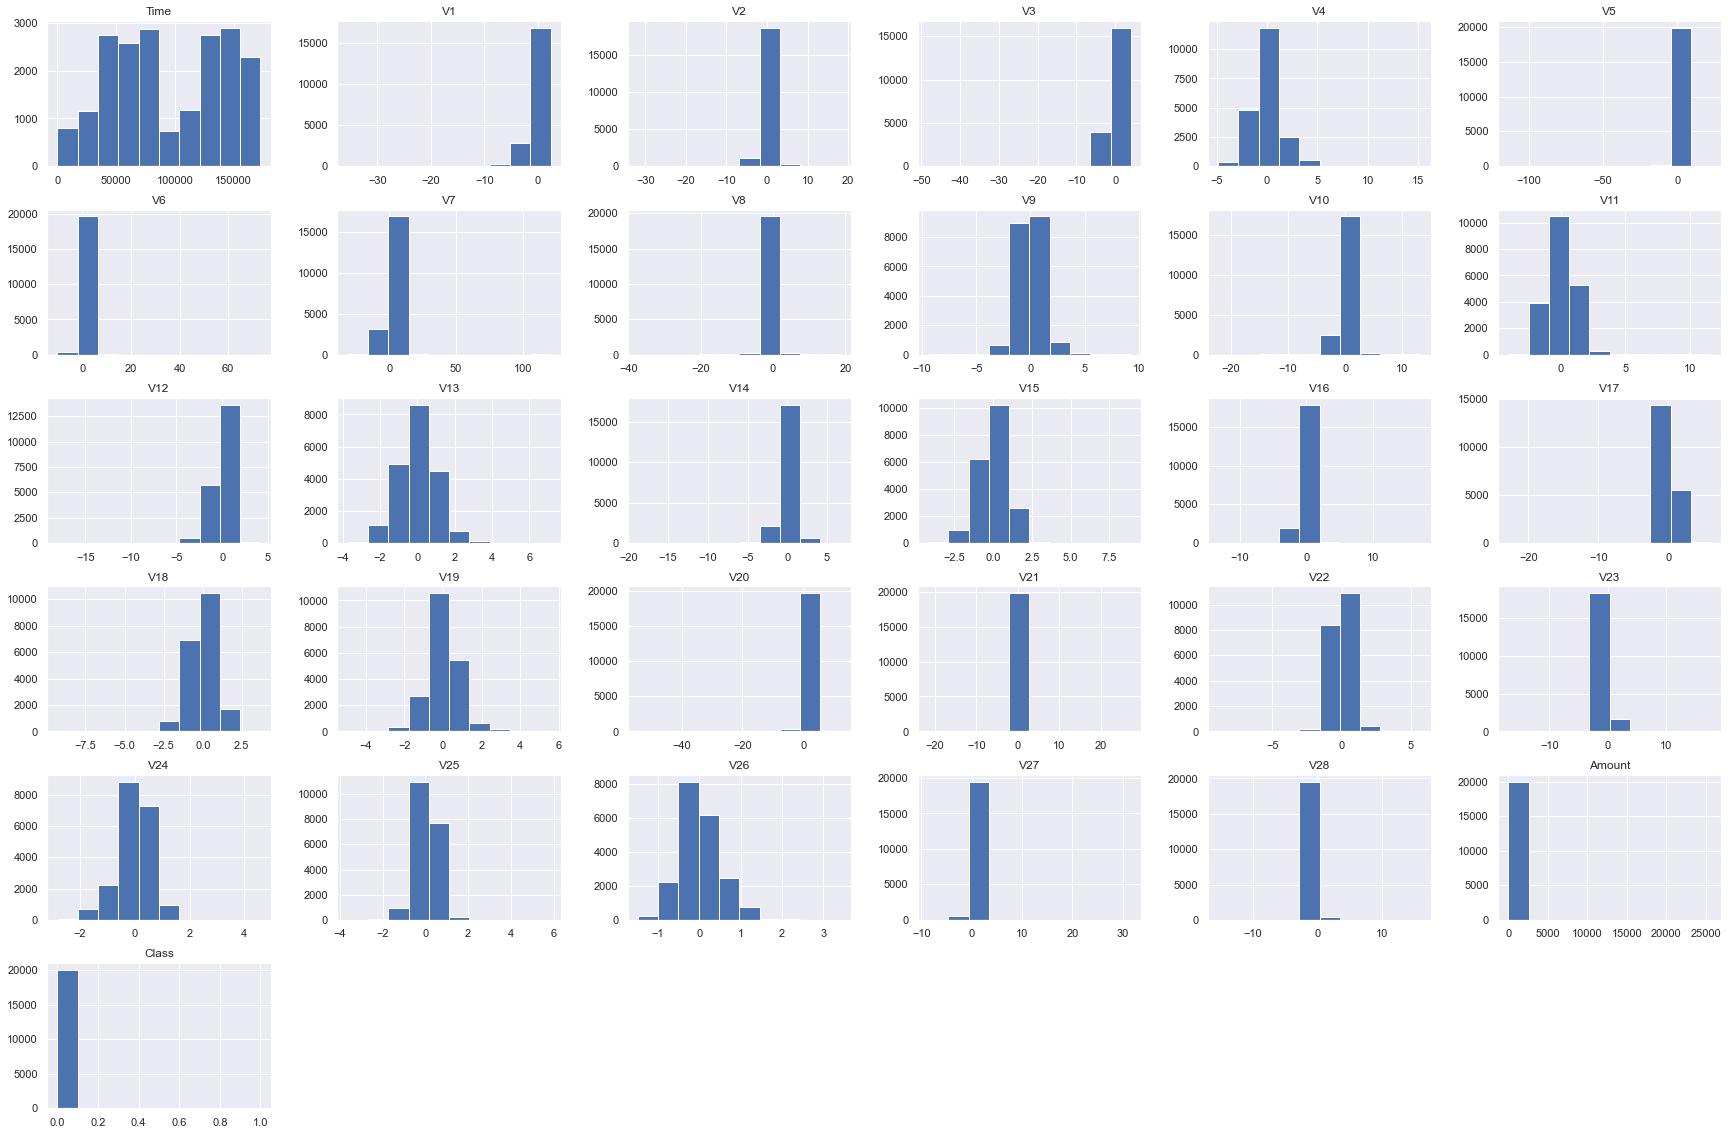

In [8]:
df.hist()
plt.show()

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,94633.175850,-0.011080,-0.000393,0.007767,0.006353,-0.010024,-0.004817,0.000025,0.001047,-0.005179,...,-0.002903,0.007045,0.004180,0.003414,-0.003204,0.006288,0.005575,-0.001778,87.936781,0.002150
std,47578.076014,1.970271,1.623190,1.551544,1.417787,1.559381,1.406019,1.455694,1.153441,1.102571,...,0.735888,0.719761,0.570910,0.609283,0.520249,0.487057,0.447275,0.358542,283.917566,0.046319
min,10.000000,-35.548539,-31.850484,-48.325589,-4.848504,-113.743307,-10.290874,-31.197329,-37.353443,-9.462573,...,-21.620120,-8.887017,-17.026156,-2.814898,-3.642052,-1.480189,-8.703068,-15.430084,0.000000,0.000000
25%,53902.000000,-0.930786,-0.609056,-0.891688,-0.840629,-0.683786,-0.770503,-0.551199,-0.206436,-0.656358,...,-0.226850,-0.531403,-0.161169,-0.347906,-0.317244,-0.321048,-0.070412,-0.053635,5.990000,0.000000
50%,84665.000000,0.015335,0.061454,0.179794,-0.010827,-0.057641,-0.280532,0.041330,0.019350,-0.057429,...,-0.028698,0.012779,-0.008256,0.043341,0.015081,-0.052605,0.002277,0.011242,22.470000,0.000000
75%,139307.250000,1.311496,0.807754,1.031525,0.749900,0.598341,0.381355,0.561400,0.326690,0.591406,...,0.188055,0.540731,0.148492,0.442516,0.342666,0.246653,0.091475,0.078517,79.000000,0.000000
max,172762.000000,2.412720,18.183626,4.079168,15.304184,22.707762,73.301626,120.589494,18.709255,9.272376,...,27.202839,5.712303,17.751731,4.584549,5.852484,3.415636,31.612198,16.129609,25691.160000,1.000000


In [10]:
def getOutlierThresholds(col):
    Q3 = np.quantile(col, 0.75)
    Q1 = np.quantile(col, 0.25)
    IQR = Q3 - Q1
    lower_rng = Q1 - 1.5*IQR
    upper_rng = Q3 + 1.5*IQR
    outl_high = list(filter(lambda x: x > upper_rng, col))
    outl_low = list(filter(lambda x: x < lower_rng, col))
    return len(outl_high)/len(col), len(outl_low)/len(col)

In [11]:
thresholds = df.apply(getOutlierThresholds)
thresholds

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,0.00000,0.01775,0.00005,0.03105,0.03150,0.07525,0.01455,0.0421,0.01905,...,0.02655,0.00110,0.0378,0.00060,0.00675,0.0165,0.06775,0.0405,0.10955,0.00215
1,0.0,0.02465,0.02915,0.01055,0.00790,0.01415,0.00665,0.01860,0.0416,0.00790,...,0.02395,0.00295,0.0282,0.01735,0.01480,0.0023,0.06690,0.0664,0.00000,0.00000


In [12]:
from scipy.stats.mstats import winsorize
data_2 = df.copy()
for cl in df.columns:
    data_2[cl] = winsorize(df[cl], limits = [thresholds[cl][1], thresholds[cl][0]])

In [13]:
if data_2.shape==df.shape:
    print('no outliers')

no outliers


In [14]:
target=df.Class
df.drop(columns='Class',inplace=True)

In [15]:
# Perform SMOTE
smo = SMOTE()
df,target = smo.fit_resample(df,target)

# PCA on SMOTE dataset

In [16]:
df_norm=scale(df)
df_norm

array([[ 1.46120227,  0.96943919, -0.77922795, ..., -0.12691854,
        -0.14312083, -0.0261387 ],
       [-0.11862972,  0.78235485, -0.62314828, ..., -0.24440814,
        -0.0114128 ,  0.11275493],
       [-1.1371795 ,  0.78498519, -0.62828312, ..., -0.14995902,
        -0.0200267 , -0.21635833],
       ...,
       [ 1.36422182,  0.60973416,  0.17678316, ...,  0.36985895,
         0.15939094, -0.31077502],
       [ 0.45752423, -0.35426962,  0.2267986 , ..., -0.88895271,
         0.59594657, -0.42375214],
       [-1.20356354, -4.48951295,  3.60936193, ...,  1.21543213,
         0.90272194, -0.07889066]])

In [17]:
pca=PCA(n_components=30)
pca_values=pca.fit_transform(df_norm)

In [18]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([3.85698422e-01, 9.42295574e-02, 8.09868087e-02, 5.52523112e-02,
       4.82609010e-02, 4.55328856e-02, 3.83755349e-02, 3.50840619e-02,
       2.89137513e-02, 2.51515503e-02, 2.32325514e-02, 2.07363784e-02,
       1.81071758e-02, 1.64434057e-02, 1.46721893e-02, 1.40084005e-02,
       1.19424941e-02, 8.58907316e-03, 7.05634184e-03, 5.72777314e-03,
       4.50432087e-03, 4.07453375e-03, 3.20530160e-03, 2.28887076e-03,
       1.98475107e-03, 1.87365243e-03, 1.61736197e-03, 1.36561109e-03,
       8.54692978e-04, 2.29336074e-04])

In [19]:
pca.components_
pca.components_[0]

array([-0.11103904, -0.24070988,  0.23650997, -0.2668426 ,  0.25625752,
       -0.23735757, -0.14225716, -0.26008077,  0.01771512, -0.25380744,
       -0.27806155,  0.25883167, -0.27419789,  0.01565435, -0.25534773,
       -0.01774533, -0.2685655 , -0.26866209, -0.24965699,  0.13943992,
        0.09383416,  0.0160134 ,  0.03151786,  0.0452886 , -0.03288145,
        0.01664396,  0.01874793,  0.01743347, -0.04956593, -0.00745255])

In [20]:
# Cumulative variance 
var1 = np.cumsum(np.round(var, decimals = 4) * 100)
var1

array([ 38.57,  47.99,  56.09,  61.62,  66.45,  71.  ,  74.84,  78.35,
        81.24,  83.76,  86.08,  88.15,  89.96,  91.6 ,  93.07,  94.47,
        95.66,  96.52,  97.23,  97.8 ,  98.25,  98.66,  98.98,  99.21,
        99.41,  99.6 ,  99.76,  99.9 ,  99.99, 100.01])

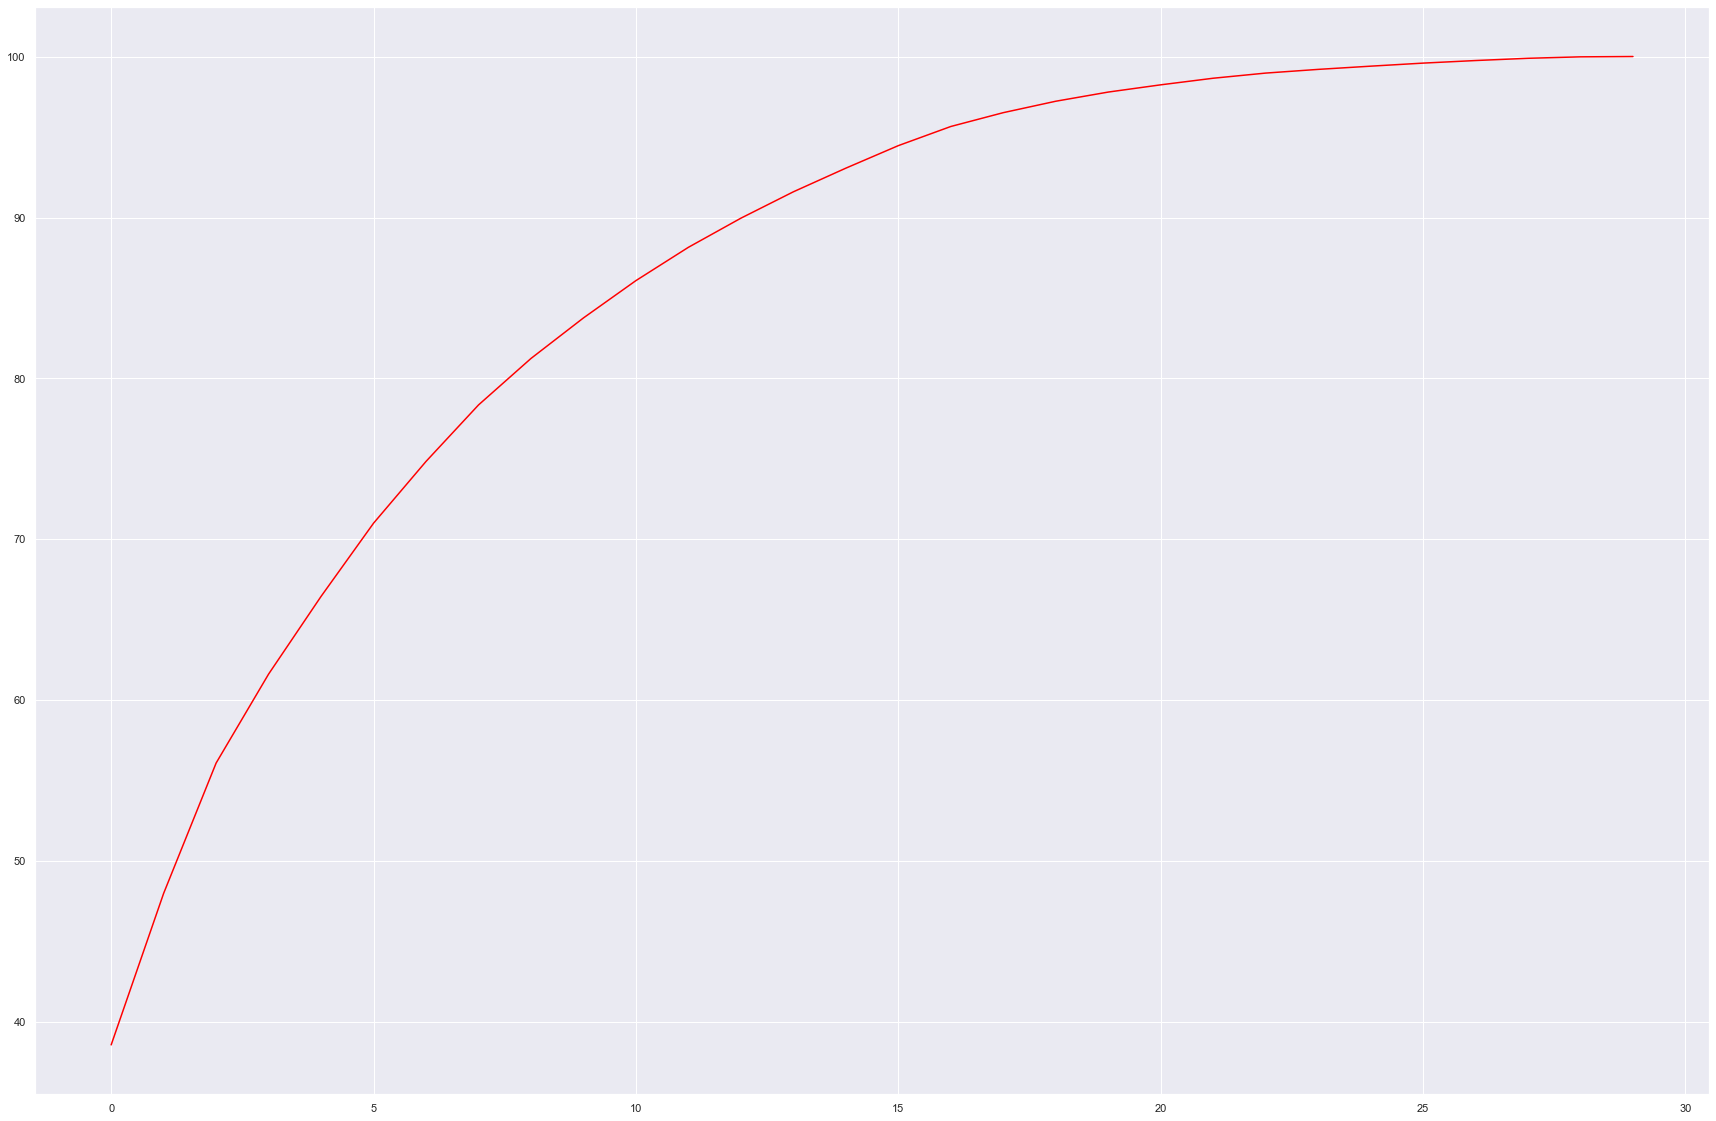

In [21]:
# Variance plot for PCA components obtained 
plt.plot(var1, color = "red")

In [22]:
df_norm=pd.DataFrame(df_norm)
target=pd.DataFrame(target)

In [23]:
df_norm.columns=columns
df_norm

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.461202,0.969439,-0.779228,0.335078,-0.566611,0.520359,0.202130,0.638909,-0.017753,0.104521,...,-0.789821,-0.211716,-0.267232,-0.020228,1.297626,0.530184,-1.204470,-0.126919,-0.143121,-0.026139
1,-0.118630,0.782355,-0.623148,0.602341,-0.693554,0.404876,-0.433848,0.734989,-0.086396,0.509902,...,-0.015548,-0.114700,-0.190681,-0.312637,1.009306,0.935603,1.956853,-0.244408,-0.011413,0.112755
2,-1.137179,0.784985,-0.628283,0.772300,-0.482232,0.268820,0.094868,0.581224,0.041954,0.785717,...,-0.338133,-0.186948,-0.468070,-0.062675,1.095238,0.638416,0.346287,-0.149959,-0.020027,-0.216358
3,-1.045556,0.827577,-0.458505,0.656547,-0.447052,0.540359,0.125535,0.657869,-0.024005,0.600231,...,-0.305442,-0.133697,-0.042425,-0.331296,-0.620021,1.440771,-0.672906,-0.094940,-0.009744,-0.356388
4,1.658062,0.962470,-0.401579,0.553879,0.531957,0.590885,0.300057,0.649570,-0.013031,0.172593,...,-0.505729,-0.009120,0.894701,-0.078236,0.162778,0.413233,0.358669,-0.138277,-0.152804,-0.348631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39909,-0.614130,-1.694786,1.134700,-1.279304,0.983689,-1.438777,-0.204057,-1.580688,-0.118527,-1.392520,...,0.705091,-0.743150,0.907288,0.777018,-0.595916,-0.084996,-0.413067,0.431903,0.352924,-0.327198
39910,-0.933013,-0.062369,-0.230839,-0.698826,1.656439,0.990650,-1.446573,0.079838,0.172501,-0.821944,...,-0.857496,0.111084,0.493217,2.553813,-0.629116,-0.683180,0.713776,0.336130,1.006965,-0.427931
39911,1.364222,0.609734,0.176783,-0.294209,1.013951,0.253517,-0.024238,-0.007799,0.286036,-0.824371,...,0.207050,0.282791,0.889182,-0.086226,-0.022337,-0.011235,0.906621,0.369859,0.159391,-0.310775
39912,0.457524,-0.354270,0.226799,-0.116985,-0.259682,-0.162291,-0.472760,-0.240543,0.365877,1.024383,...,-1.157070,0.350907,0.017643,0.406645,-0.379479,0.261207,0.279879,-0.888953,0.595947,-0.423752


In [24]:
bestfeatures=SelectKBest(score_func=chi2,k=28)

In [25]:
x_abs=df_norm.abs()

In [26]:
fit=bestfeatures.fit(x_abs,target)
ccscores=pd.DataFrame(fit.scores_)
cccolumns=pd.DataFrame(x_abs.columns)

featureScore=pd.concat([cccolumns,ccscores],axis=1)
featureScore.columns=['Features','Score']
featureScore.nlargest(28,'Score')

best_col=featureScore.nlargest(28,'Score').Features
best_col

8         V8
27       V27
28       V28
21       V21
23       V23
5         V5
18       V18
20       V20
17       V17
2         V2
22       V22
6         V6
1         V1
9         V9
7         V7
24       V24
16       V16
19       V19
13       V13
10       V10
25       V25
0       Time
11       V11
3         V3
12       V12
29    Amount
15       V15
14       V14
Name: Features, dtype: object

In [27]:
fscols=[]
for i in best_col:
    fscols.append(i)
fselected=df_norm[fscols]
fselected.shape

(39914, 28)

In [28]:
fselected

,V8,V27,V28,V21,V23,V5,V18,V20,V17,V2,...,V13,V10,V25,Time,V11,V3,V12,Amount,V15,V14
0,-0.017753,-0.126919,-0.143121,-0.211716,-0.020228,0.520359,1.166621,-0.789821,0.657987,-0.779228,...,-0.359577,1.003071,0.530184,1.461202,-0.612974,0.335078,0.882854,-0.026139,-1.508057,0.964447
1,-0.086396,-0.244408,-0.011413,-0.114700,-0.312637,0.404876,0.235705,-0.015548,0.643741,-0.623148,...,0.742008,0.683942,0.935603,-0.118630,-0.819474,0.602341,0.876181,0.112755,0.787516,0.905867
2,0.041954,-0.149959,-0.020027,-0.186948,-0.062675,0.268820,0.498151,-0.338133,0.661797,-0.628283,...,-1.072964,0.716439,0.638416,-1.137179,-0.392096,0.772300,0.944563,-0.216358,-0.986034,0.890360
3,-0.024005,-0.094940,-0.009744,-0.133697,-0.331296,0.540359,0.596191,-0.305442,0.535640,-0.458505,...,0.972365,0.719066,1.440771,-1.045556,-1.130508,0.656547,0.831593,-0.356388,1.012999,0.864382
4,-0.013031,-0.138277,-0.152804,-0.009120,-0.078236,0.590885,0.405389,-0.505729,0.543151,-0.401579,...,0.764350,1.061247,0.413233,1.658062,-1.177094,0.553879,0.789209,-0.348631,-1.037089,0.829409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39909,-0.118527,0.431903,0.352924,-0.743150,0.777018,-1.438777,-1.074768,0.705091,-1.334013,1.134700,...,-1.327634,-1.277970,-0.084996,-0.614130,0.841461,-1.279304,-0.886784,-0.327198,1.246177,-0.770089
39910,0.172501,0.336130,1.006965,0.111084,2.553813,0.990650,0.604061,-0.857496,0.511577,-0.230839,...,-0.830064,-0.113684,-0.683180,-0.933013,1.110932,-0.698826,-0.381394,-0.427931,0.712672,-1.430364
39911,0.286036,0.369859,0.159391,0.282791,-0.086226,0.253517,-0.816467,0.207050,-0.733782,0.176783,...,-0.938732,0.069704,-0.011235,1.364222,-0.051152,-0.294209,-0.559309,-0.310775,0.100245,-0.286159
39912,0.365877,-0.888953,0.595947,0.350907,0.406645,-0.162291,0.598280,-1.157070,0.015843,0.226799,...,0.177329,-0.364509,0.261207,0.457524,0.573738,-0.116985,-0.661486,-0.423752,-0.995846,-0.148731


In [29]:
pca=PCA(n_components=28)
pca_values_fs=pca.fit_transform(fselected)

In [30]:
# The amount of variance that each PCA explains is 
varfs = pca.explained_variance_ratio_
varfs

array([3.86639165e-01, 1.00720727e-01, 8.44160597e-02, 5.87437231e-02,
       5.10279878e-02, 4.68646595e-02, 3.86121458e-02, 3.35085290e-02,
       2.99016171e-02, 2.57811864e-02, 2.21417043e-02, 1.96015597e-02,
       1.76157011e-02, 1.57797529e-02, 1.50182476e-02, 1.21515353e-02,
       9.38801532e-03, 7.52015930e-03, 5.36179220e-03, 4.46235959e-03,
       3.47446877e-03, 2.46213763e-03, 2.13857496e-03, 2.01174234e-03,
       1.97326720e-03, 1.48168394e-03, 9.28757129e-04, 2.72740975e-04])

In [31]:
pca.components_
pca.components_[0]

array([ 0.01826016,  0.01580351, -0.05215295,  0.01838597,  0.04690372,
       -0.24782693, -0.26058624,  0.09629941, -0.27945422,  0.24471228,
        0.0307439 , -0.14668837, -0.25018486, -0.26086044, -0.2696863 ,
       -0.03196185, -0.27873375,  0.14566881,  0.01573952, -0.28755639,
        0.01847411, -0.11489515,  0.26605427, -0.27502088, -0.28260958,
       -0.00845192, -0.01670105, -0.26210151])

In [32]:
# Cumulative variance 
var1fs = np.cumsum(np.round(varfs, decimals = 4) * 100)
var1fs

array([ 38.66,  48.73,  57.17,  63.04,  68.14,  72.83,  76.69,  80.04,
        83.03,  85.61,  87.82,  89.78,  91.54,  93.12,  94.62,  95.84,
        96.78,  97.53,  98.07,  98.52,  98.87,  99.12,  99.33,  99.53,
        99.73,  99.88,  99.97, 100.  ])

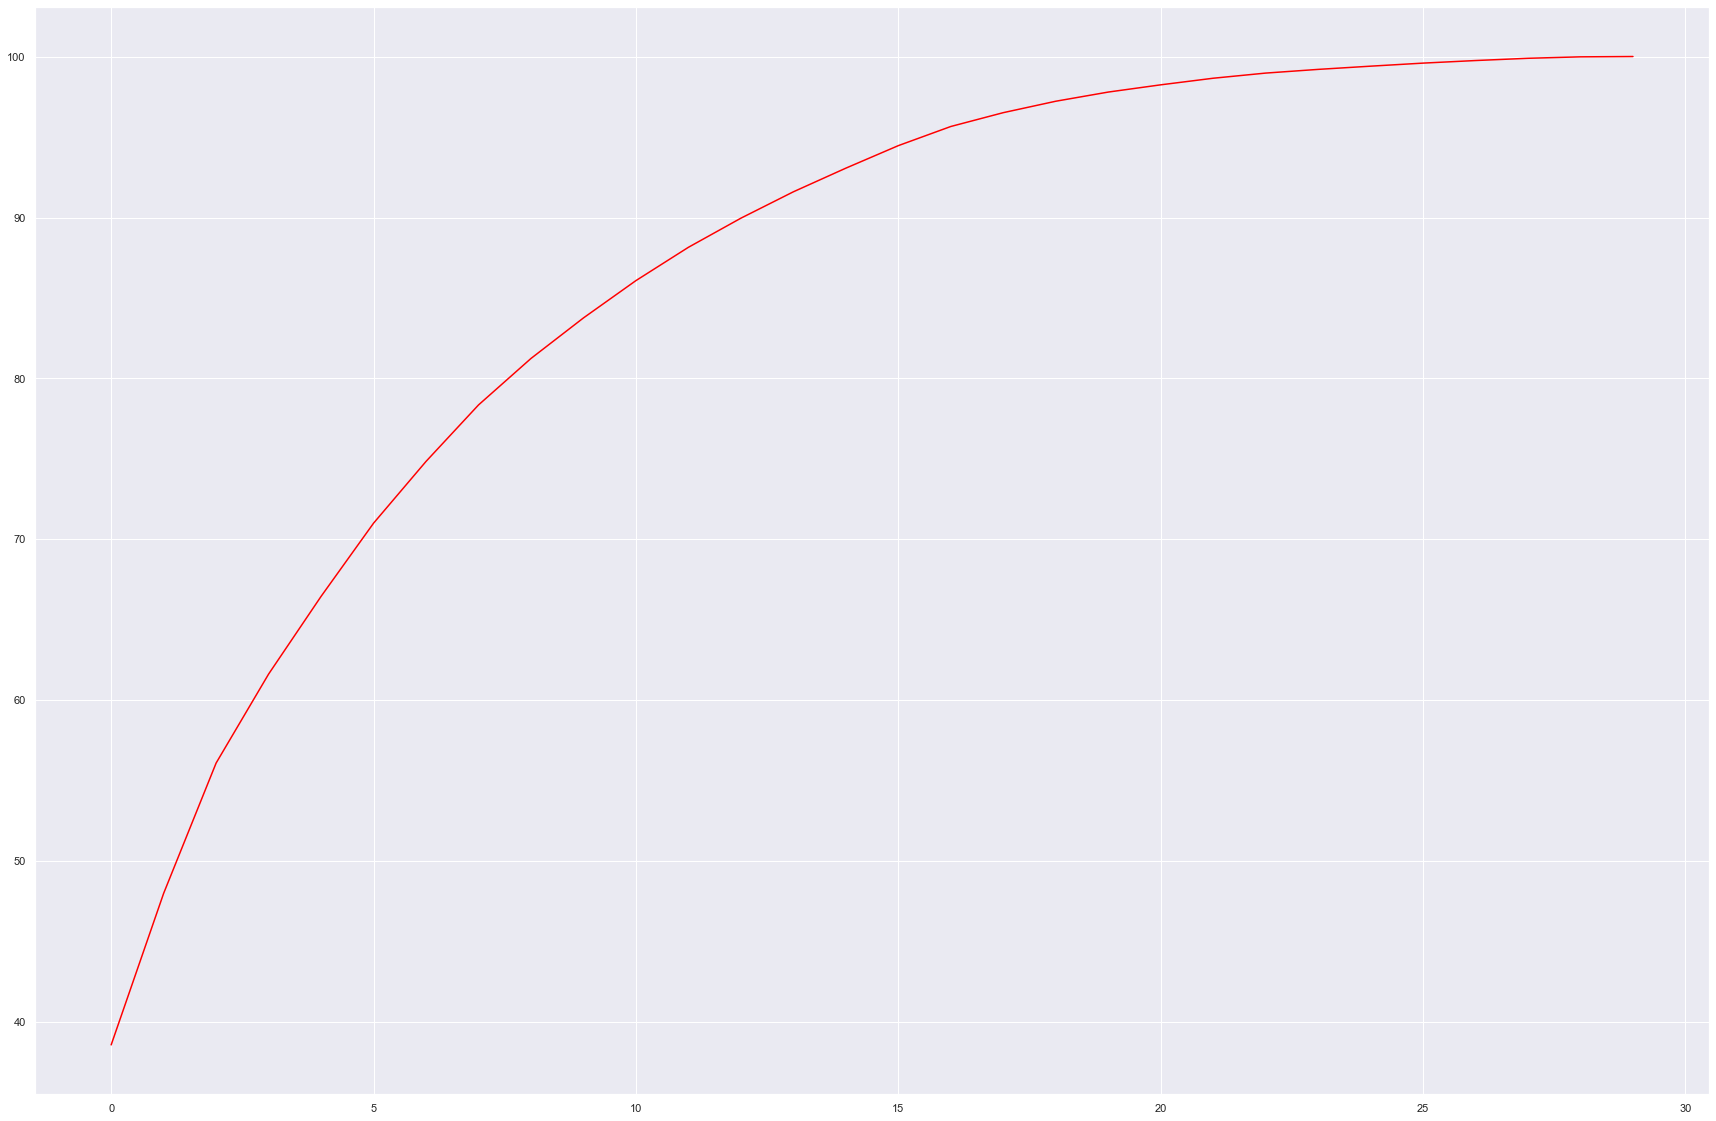

In [33]:
# Variance plot for PCA components obtained 
plt.plot(var1, color = "red")

In [34]:
x_train,x_test,y_train,y_test=train_test_split(pca_values_fs,target,test_size=0.3,
                                              random_state=0,
                                              stratify=target)

In [35]:
lr=LogisticRegression(random_state=14).fit(x_train, y_train)

C:\Users\toanb\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\toanb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
y_pred=lr.predict(x_test)

In [37]:
accuracy_score(y_test,y_pred)

0.9946555323590814

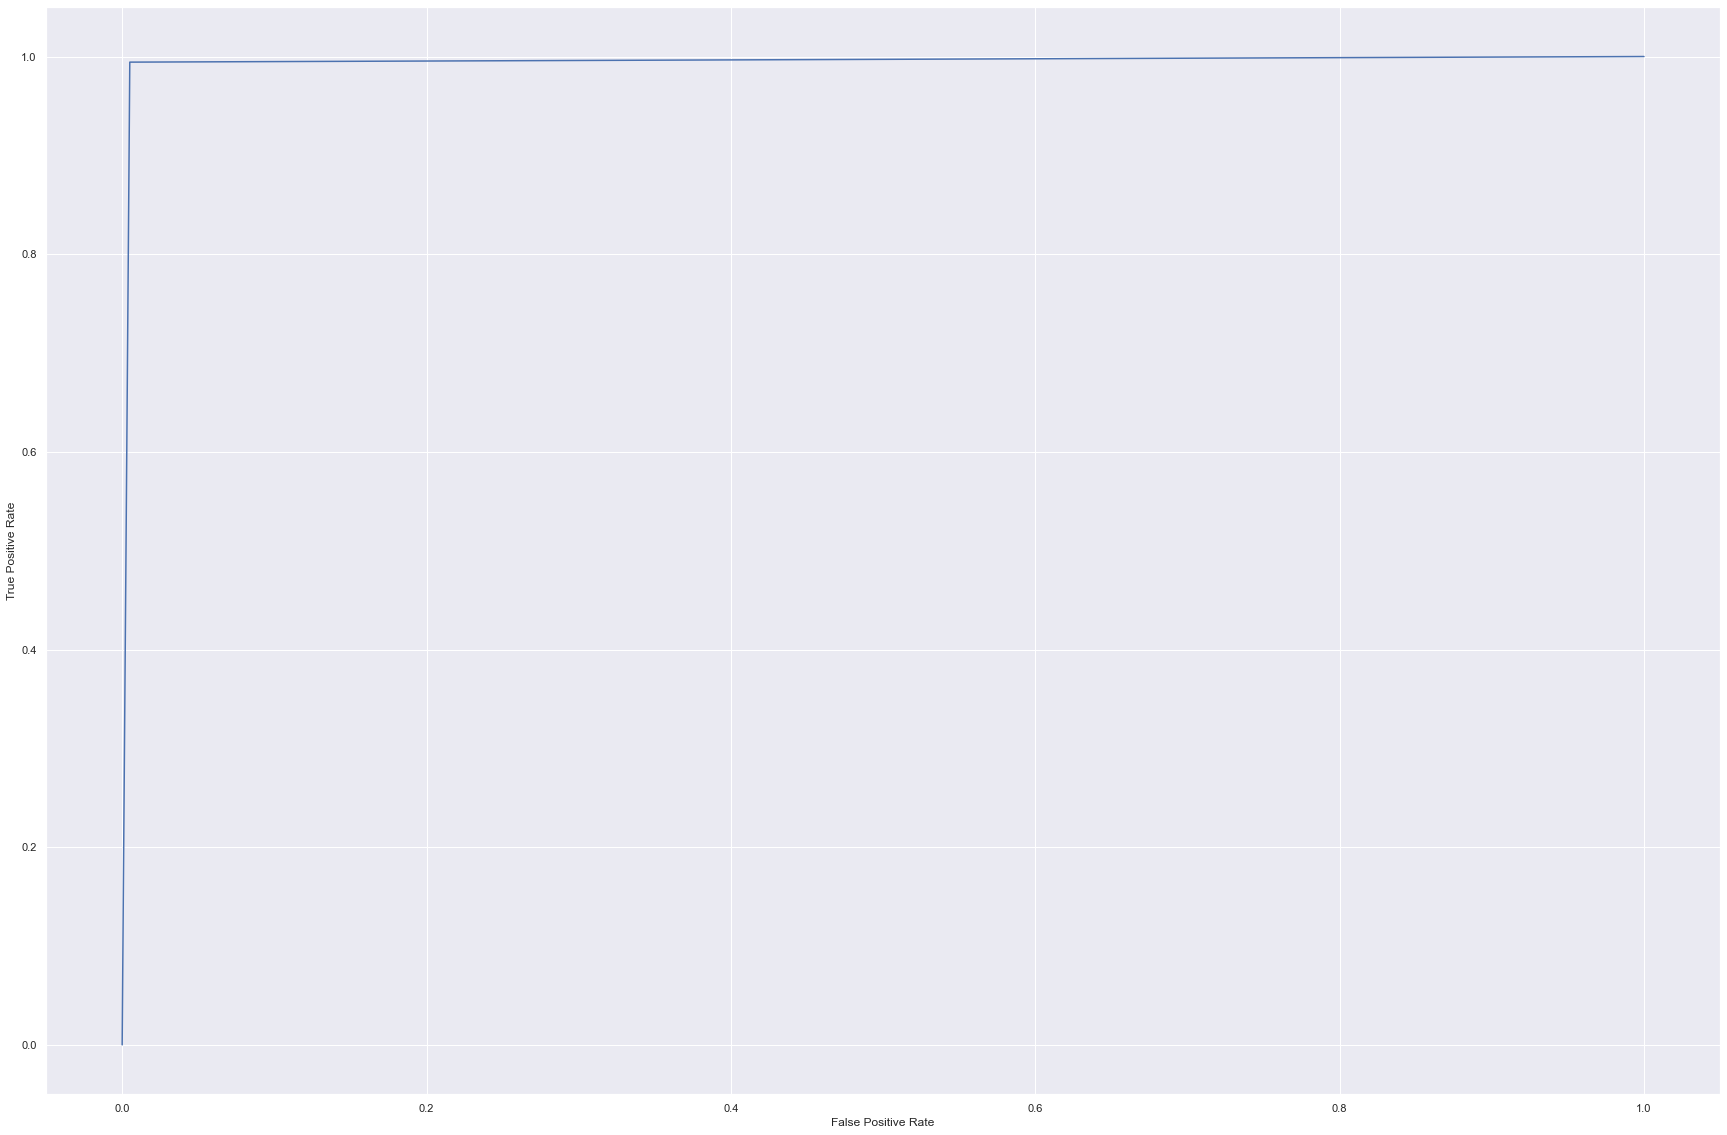

In [38]:
y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [39]:
confusion_matrx = pd.crosstab(y_pred, y_test.Class)
confusion_matrx

Class,0,1
row_0,,
0,5958,34
1,30,5953


In [40]:
# Simple logistic regression
classification_test_lr = classification_report(y_pred, y_test.Class)
print(classification_test_lr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5992
           1       0.99      0.99      0.99      5983

    accuracy                           0.99     11975
   macro avg       0.99      0.99      0.99     11975
weighted avg       0.99      0.99      0.99     11975



In [41]:
# creating empty list variable 
acc = []

best=100
best_k=0
for i in range(3,25,2):
    neigh = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    neigh.fit(x_train, y_train)
    train_acc = np.mean(neigh.predict(x_train) == y_train.Class)
    test_acc = np.mean(neigh.predict(x_test) == y_test.Class)
    acc.append([train_acc, test_acc])
    if abs(train_acc-test_acc)<best:
        best=abs(train_acc-test_acc)
        best_k=i

C:\Users\toanb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\toanb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\toanb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\toanb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

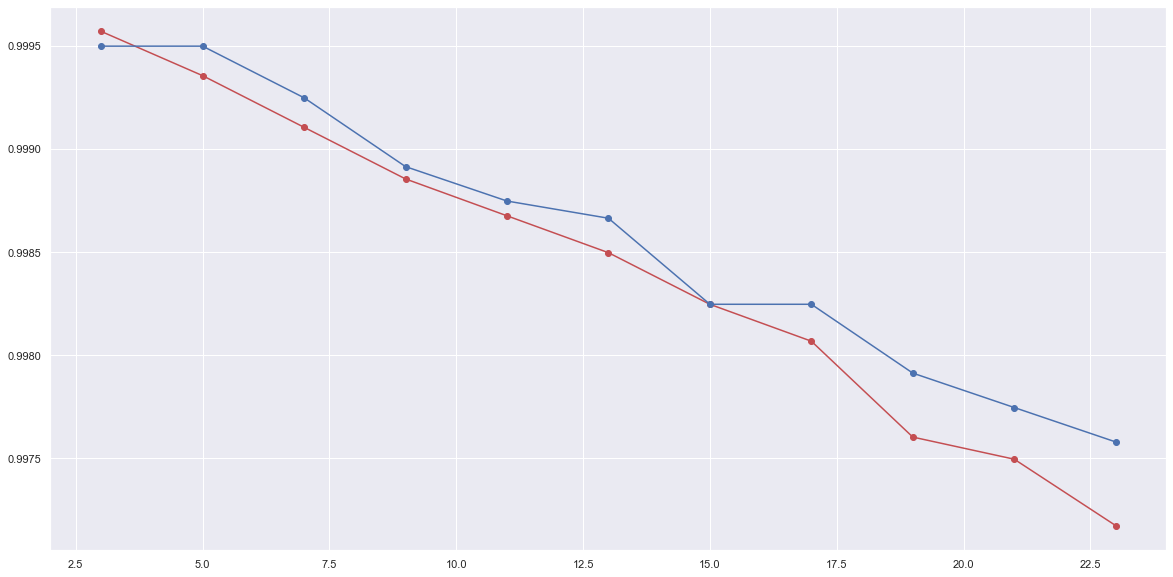

In [42]:
# train accuracy plot 
plt.figure(figsize=(20,10))
plt.plot(np.arange(3,25,2),[i[0] for i in acc],"ro-")
# test accuracy plot
plt.plot(np.arange(3,25,2),[i[1] for i in acc],"bo-")

In [43]:
knn_best = KNeighborsClassifier(n_neighbors = best_k)
knn_best.fit(x_train,y_train)

pred_bestk = knn_best.predict(x_test)
pred_bestk

C:\Users\toanb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [44]:
classification_test_knn = classification_report(pred_bestk, y_test.Class)
print(classification_test_knn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5967
           1       1.00      1.00      1.00      6008

    accuracy                           1.00     11975
   macro avg       1.00      1.00      1.00     11975
weighted avg       1.00      1.00      1.00     11975



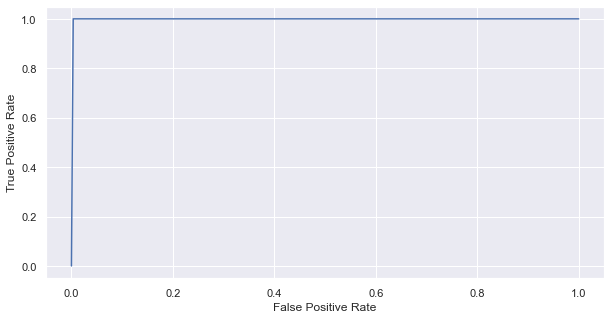

In [45]:
y_pred_proba_knn = knn_best.predict_proba(x_test)[::,1]
fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test,  pred_bestk)

#create ROC curve
plt.figure(figsize=(10,5))
plt.plot(fpr_knn,tpr_knn)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [46]:
columns_fs=''
for i in fselected.columns:
    columns_fs=columns_fs+i+'+'
columns_fs

'V8+V27+V28+V21+V23+V5+V18+V20+V17+V2+V22+V6+V1+V9+V7+V24+V16+V19+V13+V10+V25+Time+V11+V3+V12+Amount+V15+V14+'

In [47]:
data=fselected
data['Class']=target

C:\Users\toanb\AppData\Local\Temp\ipykernel_16280\2161366427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Class']=target


In [50]:
logit_model = sm.logit('Class ~ V8+V27+V28+V21+V23+V5+V18+V20+V17+V2+V22+V6+V1+V9+V7+V24+V16+V19+V13+V10+V25+Time+V11+V3+V12+Amount+V15+V14', data = fselected).fit()

Optimization terminated successfully.
         Current function value: 0.012810
         Iterations 34


In [51]:
pred = logit_model.predict(data.iloc[ :, : -1])

In [52]:
fpr, tpr, thresholds = roc_curve(data.Class, pred)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.4345081764522754

In [53]:
train_data, test_data = train_test_split(data,test_size = 0.3) # 30% test data

In [55]:
logit_model = sm.logit('Class ~ V8+V27+V28+V21+V23+V5+V18+V20+V17+V2+V22+V6+V1+V9+V7+V24+V16+V19+V13+V10+V25+Time+V11+V3+V12+Amount+V15+V14', data = train_data).fit()

Optimization terminated successfully.
         Current function value: 0.010171
         Iterations 19


In [56]:
logit_model.summary2() # for AIC


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Pseudo R-squared: 0.985   
Dependent Variable: Class            AIC:              626.3342
Date:               2022-09-06 02:54 BIC:              865.2298
No. Observations:   27939            Log-Likelihood:   -284.17 
Df Model:           28               LL-Null:          -19366. 
Df Residuals:       27910            LLR p-value:      0.0000  
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     19.0000                                    
---------------------------------------------------------------
             Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
---------------------------------------------------------------
Intercept    32.8572   3.3807   9.7191 0.0000  26.2312  39.4832
V8            1.5281   0.8782   1.7401 0.0818  -0.1931   3.2493
V27           2.2663   0.6435   3.5218 0.0004   1.0051   3.5276
V28           2.7922   0.3436   8.1253 0.0000   2.1187   3.4658
V21         -12.5319   1.0824 -11.5782 0.0000 -14.6534 -10.4105
V23           6.6570   0.6246  10.6585 0.0000   5.4328   7.8811
V5           16.9829   2.0298   8.3669 0.0000  13.0046  20.9612
V18           1.7778   1.6318   1.0895 0.2759  -1.4204   4.9760
V20          -5.3885   0.5569  -9.6756 0.0000  -6.4801  -4.2970
V17         -29.3752   4.2909  -6.8460 0.0000 -37.7852 -20.9653
V2           29.7031   3.1740   9.3583 0.0000  23.4822  35.9241
V22           2.8183   0.3920   7.1896 0.0000   2.0500   3.5866
V6          -14.2409   1.7960  -7.9294 0.0000 -17.7609 -10.7208
V1           28.1231   2.6717  10.5264 0.0000  22.8867  33.3595
V9            0.1304   0.5364   0.2431 0.8079  -0.9209   1.1816
V7          -30.4768   3.2338  -9.4245 0.0000 -36.8149 -24.1387
V24           3.0328   0.3445   8.8032 0.0000   2.3575   3.7080
V16          -1.2637   1.4121  -0.8949 0.3708  -4.0313   1.5039
V19           7.7137   0.8886   8.6812 0.0000   5.9722   9.4552
V13          -0.9502   0.2280  -4.1682 0.0000  -1.3970  -0.5034
V10           3.1100   0.8042   3.8671 0.0001   1.5338   4.6862
V25           1.2242   0.2400   5.0998 0.0000   0.7537   1.6947
Time         -1.6688   0.2770  -6.0253 0.0000  -2.2117  -1.1260
V11          -4.4331   0.9992  -4.4367 0.0000  -6.3915  -2.4747
V3           21.1916   2.4376   8.6938 0.0000  16.4141  25.9691
V12         -15.5416   1.5362 -10.1168 0.0000 -18.5526 -12.5307
Amount       22.0334   2.2492   9.7962 0.0000  17.6251  26.4417
V15          -2.6108   0.4941  -5.2843 0.0000  -3.5791  -1.6424
V14         -23.3063   1.7480 -13.3328 0.0000 -26.7324 -19.8802
===============================================================

"""

In [57]:
logit_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                27939
Model:                          Logit   Df Residuals:                    27910
Method:                           MLE   Df Model:                           28
Date:                Tue, 06 Sep 2022   Pseudo R-squ.:                  0.9853
Time:                        02:54:24   Log-Likelihood:                -284.17
converged:                       True   LL-Null:                       -19366.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.8572      3.381      9.719      0.000      26.231      39.483
V8             1.5281      0.878      1.740      0.082      -0.193       3.249
V27            2.2663      0.644      3.522      0.000       1.005       3.528
V28            2.7922      0.344      8.125      0.000       2.119       3.466
V21          -12.5319      1.082    -11.578      0.000     -14.653     -10.411
V23            6.6570      0.625     10.658      0.000       5.433       7.881
V5            16.9829      2.030      8.367      0.000      13.005      20.961
V18            1.7778      1.632      1.089      0.276      -1.420       4.976
V20           -5.3885      0.557     -9.676      0.000      -6.480      -4.297
V17          -29.3752      4.291     -6.846      0.000     -37.785     -20.965
V2            29.7031      3.174      9.358      0.000      23.482      35.924
V22            2.8183      0.392      7.190      0.000       2.050       3.587
V6           -14.2409      1.796     -7.929      0.000     -17.761     -10.721
V1            28.1231      2.672     10.526      0.000      22.887      33.359
V9             0.1304      0.536      0.243      0.808      -0.921       1.182
V7           -30.4768      3.234     -9.424      0.000     -36.815     -24.139
V24            3.0328      0.345      8.803      0.000       2.358       3.708
V16           -1.2637      1.412     -0.895      0.371      -4.031       1.504
V19            7.7137      0.889      8.681      0.000       5.972       9.455
V13           -0.9502      0.228     -4.168      0.000      -1.397      -0.503
V10            3.1100      0.804      3.867      0.000       1.534       4.686
V25            1.2242      0.240      5.100      0.000       0.754       1.695
Time          -1.6688      0.277     -6.025      0.000      -2.212      -1.126
V11           -4.4331      0.999     -4.437      0.000      -6.392      -2.475
V3            21.1916      2.438      8.694      0.000      16.414      25.969
V12          -15.5416      1.536    -10.117      0.000     -18.553     -12.531
Amount        22.0334      2.249      9.796      0.000      17.625      26.442
V15           -2.6108      0.494     -5.284      0.000      -3.579      -1.642
V14          -23.3063      1.748    -13.333      0.000     -26.732     -19.880
==============================================================================

Possibly complete quasi-separation: A fraction 0.88 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [58]:
test_pred = logit_model.predict(test_data)

In [59]:
test_data.shape

(11975, 29)

In [61]:
test_data["test_pred"] = np.zeros(11975)

In [62]:
test_data.loc[test_pred > optimal_threshold, "test_pred"] = 1

In [63]:
# confusion matrix 
confusion_matrix = pd.crosstab(test_data.test_pred, test_data['Class'])
confusion_matrix

Class,0,1
test_pred,,
0.0,5991,7
1.0,21,5956


In [66]:
accuracy_test = (5991+5956)/(5991+5956+7+21)
accuracy_test

0.9976617954070981

In [67]:
classification_test_logit = classification_report(test_data["test_pred"], test_data["Class"])
print(classification_test_logit)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5998
         1.0       1.00      1.00      1.00      5977

    accuracy                           1.00     11975
   macro avg       1.00      1.00      1.00     11975
weighted avg       1.00      1.00      1.00     11975



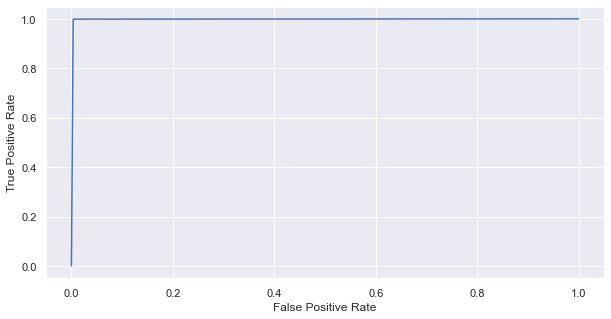

In [68]:
fpr_logit, tpr_logit, _ = metrics.roc_curve(test_data["Class"],  test_data["test_pred"])

#create ROC curve
plt.figure(figsize=(10,5))
plt.plot(fpr_logit,tpr_logit)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [69]:
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train, y_train)
pred_test_linear = model_linear.predict(x_test)
np.mean(pred_test_linear == y_test.Class)

C:\Users\toanb\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9966597077244259

In [70]:
# kernel = rbf
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train, y_train)
pred_test_rbf = model_rbf.predict(x_test)

np.mean(pred_test_rbf==y_test.Class)

C:\Users\toanb\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9996659707724426

In [71]:
# kernel =POLY
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train, y_train)
pred_test_poly = model_poly.predict(x_test)

np.mean(pred_test_poly==y_test.Class)

C:\Users\toanb\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9993319415448851

In [72]:
# kernel =sigmoid
model_sig = SVC(kernel = "sigmoid")
model_sig.fit(x_train, y_train)
pred_test_sig = model_sig.predict(x_test)

np.mean(pred_test_sig==y_test.Class)

C:\Users\toanb\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9363674321503132

In [85]:
classification_test_svm_poly = classification_report(pred_test_poly, y_test.Class)
print(classification_test_svm_poly)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5980
           1       1.00      1.00      1.00      5995

    accuracy                           1.00     11975
   macro avg       1.00      1.00      1.00     11975
weighted avg       1.00      1.00      1.00     11975



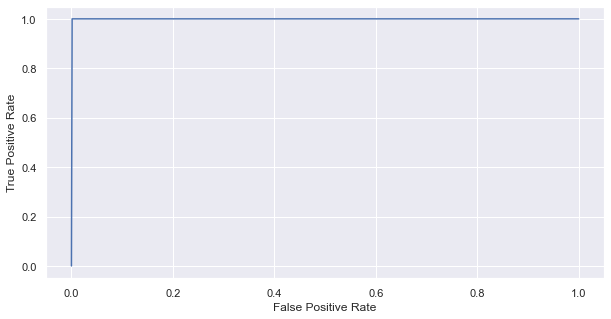

In [86]:
fpr_poly, tpr_poly, _ = metrics.roc_curve(y_test.Class,  pred_test_poly)

#create ROC curve
plt.figure(figsize=(10,5))
plt.plot(fpr_poly,tpr_poly)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [87]:
x_train_abs=abs(x_train)
x_test_abs=abs(x_test)

In [88]:
classifier_mb = MB()
classifier_mb.fit(x_train_abs, y_train)

C:\Users\toanb\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [89]:
# Evaluation on Test Data
test_pred_nb = classifier_mb.predict(x_test_abs)
accuracy_test = np.mean(test_pred_nb == y_test.Class)
accuracy_test

0.8514405010438414

In [90]:
pd.crosstab(test_pred_nb, y_test.Class)

Class,0,1
row_0,,
0,5759,1550
1,229,4437


In [91]:
# Training Data accuracy
train_pred_nb = classifier_mb.predict(x_train_abs)
accuracy_train = np.mean(train_pred_nb == y_train.Class)
accuracy_train

0.8574036293353376

In [92]:
classification_test_nb = classification_report(test_pred_nb, y_test.Class)
print(classification_test_nb)

              precision    recall  f1-score   support

           0       0.96      0.79      0.87      7309
           1       0.74      0.95      0.83      4666

    accuracy                           0.85     11975
   macro avg       0.85      0.87      0.85     11975
weighted avg       0.88      0.85      0.85     11975



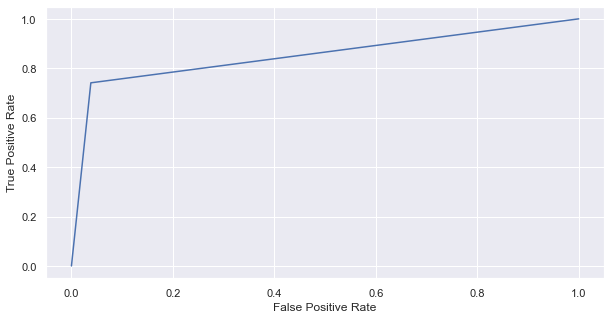

In [93]:
fpr_nb, tpr_nb, _ = metrics.roc_curve(y_test.Class,  test_pred_nb)

#create ROC curve
plt.figure(figsize=(10,5))
plt.plot(fpr_nb,tpr_nb)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [94]:
print("Logistic Regression (logit)\n",classification_test_logit)
print("KNN k=15 \n",classification_test_knn)
print("SVM (poly) \n",classification_test_svm_poly)
print("Naive Bayes \n",classification_test_nb)

Logistic Regression (logit)
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5998
         1.0       1.00      1.00      1.00      5977

    accuracy                           1.00     11975
   macro avg       1.00      1.00      1.00     11975
weighted avg       1.00      1.00      1.00     11975

KNN k=15 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5967
           1       1.00      1.00      1.00      6008

    accuracy                           1.00     11975
   macro avg       1.00      1.00      1.00     11975
weighted avg       1.00      1.00      1.00     11975

SVM (poly) 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5980
           1       1.00      1.00      1.00      5995

    accuracy                           1.00     11975
   macro avg       1.00      1.00      1.00     11975
weighted avg       1.

In [95]:
best_k

15

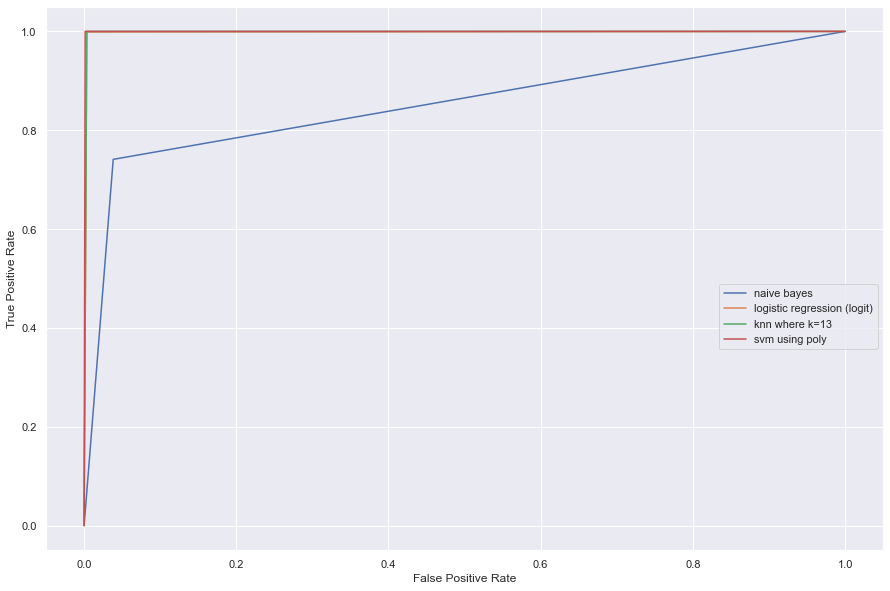

In [96]:
plt.figure(figsize=(15,10))
plt.plot(fpr_nb,tpr_nb,label='naive bayes')
plt.plot(fpr_logit,tpr_logit,label='logistic regression (logit)')
plt.plot(fpr_knn,tpr_knn,label='knn where k=13')
plt.plot(fpr_poly,tpr_poly,label='svm using poly')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.show()